# Question 2

Perform 5 data visualization tasks on the student performance dataset given in the link below (create
5 different visualizations). Explain what kind analysis has become easier with each of the visualizations.
Create the folder structure for this question similar to question 1. (15 points)

## Table of Contents

* Step 1: [Importing the Data](#step-1-importing-the-data)
* Step 2: [Data Visualization](#step-2-data-visualization)
  * Visualization 1: [Scatter Plot](#visualization-1-scatter-plot) - Compare the relationship between parental education and math score
  * Visualization 2: [Pie Charts](#visualization-2-pie-chart) - Charts to evaluate proportions for parental education, race, gender, and lunch type
  * Visualization 3: [Bar Chart](#visualization-3-bar-chart) - Comparing average test scores for those who completed the test prep course and those who did not
  * Visualization 4: [Histogram](#visualization-4-histogram) - Distribution of test scores for those who completed the test prep course and those who did not

In [83]:
import pandas as pd
from matplotlib import pyplot as plt

## Step 1. Import and Clean Data

The dataset was provided as part of the assignment, so I do not have information on how it was collected. However, the dataset is clean and does not have any missing values. The dataset contains 1000 rows and 7 columns. 

The columns are as follows:
- `gender`: Listed as `male` or `female`
- `race/ethnicity`: Listed as `group A`, `group B`, `group C`, or `group D`
- `parental level of education`: Listed as `some high school`, `high school`, `some college`, `associate's degree`, `bachelor's degree`, or `master's degree`
- `lunch`: Either `standard` or `free/reduced`
- `test preparation course`: Either `none` or `completed`
- `math score`: Numerical value between 0 and 100
- `reading score`: Numerical value between 0 and 100
- `writing score`: Numerical value between 0 and 100

In [84]:
df = pd.read_csv('data/question_2.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [85]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## Step 2. Create Visualizations

### Visualization 1: Scatter Plot

I decided to try a scatter plot to see if there is a relationship between parental education and students' performance. I use the `math score` as the dependent variable and `parental level of education` as the independent variable.

The resulting visualization was not at all what I expected. It seems like a scatter plot really requires a continuous variable for the x-axis. 

Still, we can clearly see a correlation between parental education and students' performance. Students whose parents have a master's degree have the highest average math score, while students whose parents have a high school education have the lowest average math score.

<Axes: title={'center': 'Parental Education vs Math Score'}, xlabel='math score', ylabel='parental level of education'>

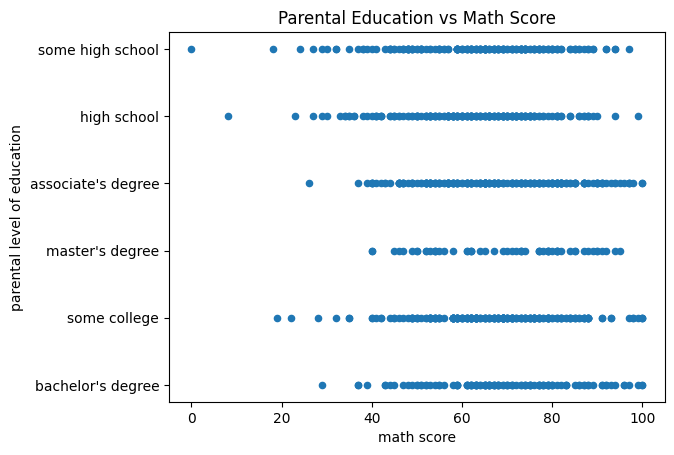

In [86]:
df.plot(kind='scatter', y='parental level of education', x='math score', title='Parental Education vs Math Score')

### Visualization 2: Pie Chart

Let's try a few pie charts now. We'll make pie charts for the following variables:

- Parental Level of Education
- Race/ethnicity
- Gender
- Lunch type

**Parental Level of Education**

These values were converted to `int` values by `pandas`, so we need to provide a dictionary to convert them back to their original values.

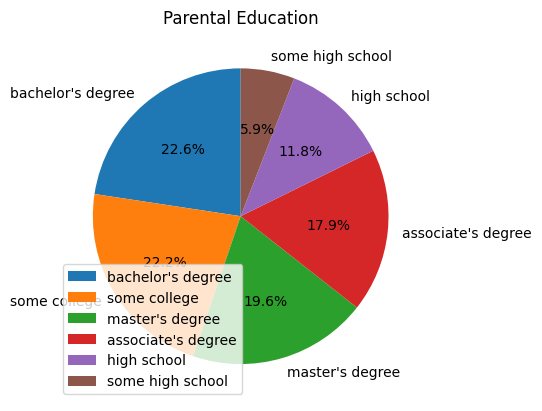

In [87]:
edu_to_str = {
    0: 'associate\'s degree',
    1: 'bachelor\'s degree',
    2: 'high school',
    3: 'master\'s degree',
    4: 'some college',
    5: 'some high school',
}

labels = df['parental level of education'].astype('category').replace(edu_to_str).unique()
sizes = df['parental level of education'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Parental Education')
plt.legend(labels, loc="best")
plt.show()

**Race/ethnicity**

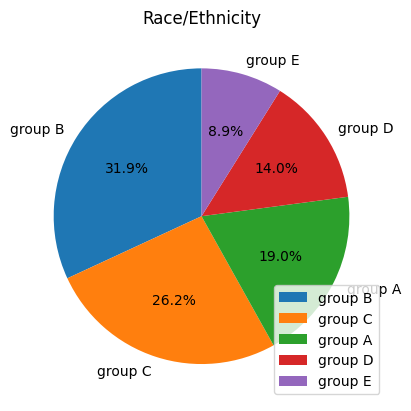

In [88]:
labels = df['race/ethnicity'].unique()
sizes = df['race/ethnicity'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Race/Ethnicity')
plt.legend(labels, loc="best")
plt.show()

**Gender**

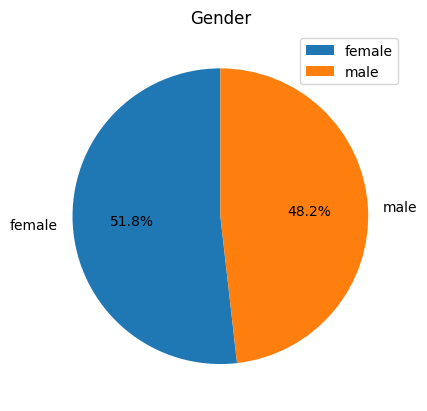

In [89]:
labels = df['gender'].unique()
sizes = df['gender'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.legend(labels, loc="best")
plt.show()

**Lunch type**

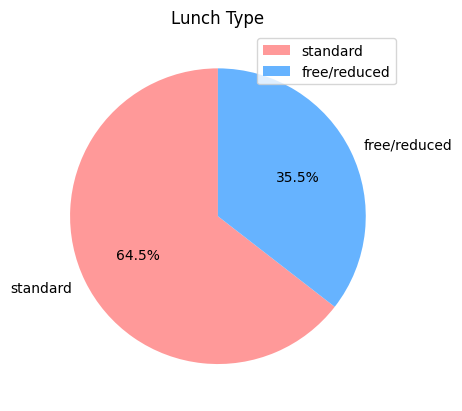

In [90]:
labels = df['lunch'].unique()
sizes = df['lunch'].value_counts()

# let's use some custom colors this time
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Lunch Type')
plt.legend(labels, loc="best")
plt.show()

### Visualization 3: Bar Chart

Let's try a bar chart now. We'll make a bar chart comparing test scores for students who completed the test preparation course and students who did not.

<Axes: title={'center': 'Test Prep Course vs Math Score'}, xlabel='test preparation course'>

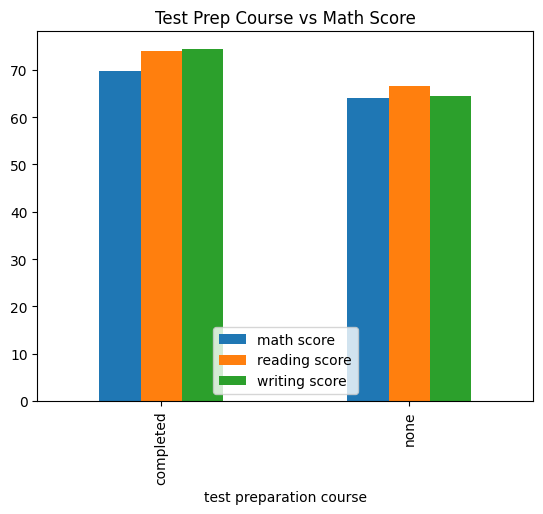

In [91]:
prep_data = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_data.plot(kind='bar', title='Test Prep Course vs Math Score')

### Visualization 4: Histogram

Let's try a histogram now. We'll make a histogram for only the `math score` variable, as histogram is a good way to visualize the distribution of a single continuous variable.

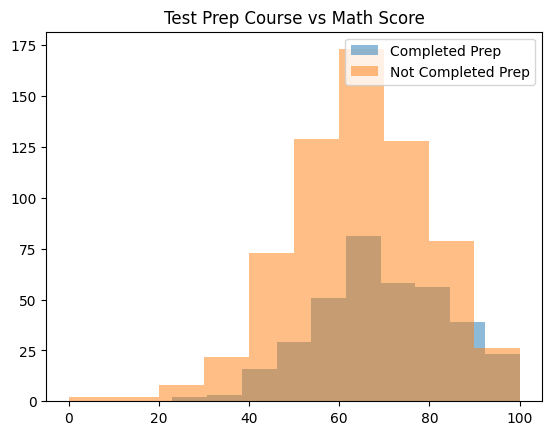

In [92]:
completed_prep = df[df['test preparation course'] == 'completed']['math score']
not_completed_prep = df[df['test preparation course'] == 'none']['math score']

plt.hist(completed_prep, alpha=0.5, label='Completed Prep')
plt.hist(not_completed_prep, alpha=0.5, label='Not Completed Prep')
plt.legend(loc='upper right')
plt.title('Test Prep Course vs Math Score')
plt.show()